# Gradient Descent Demonstration (from scratch)

* Batch Gradient Descent: It is an `optimization algorithm` that used to minimize the **cost function** updating gradient----> updating weights & biases **only once** for the entire data set

In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

# `Simple linear regression data` basically one input & one output

In [2]:
# Generate the random linear data
def Generate_data(n_samples=100,noise=0.1,seed=42):
  np.random.seed(seed)
  x = 2*np.random.randn(n_samples,1)
  y = 4 + 3*x + noise * np.random.randn(n_samples,1)
  return x,y

In [3]:
# Let's Generate random data
x,y = Generate_data(n_samples=100,noise=2)

In [4]:
x.shape

(100, 1)

In [5]:
y.shape

(100, 1)

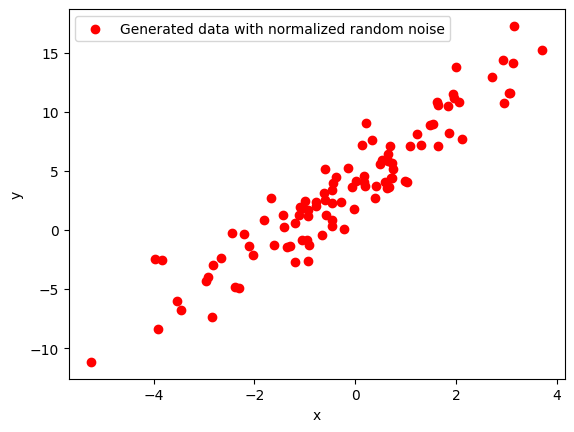

In [6]:
# Let's plot the generate data distribution
plt.scatter(x,y,color='r',label = 'Generated data with normalized random noise')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Adding`unit bias`term to X

In [7]:
x[:10]

array([[ 0.99342831],
       [-0.2765286 ],
       [ 1.29537708],
       [ 3.04605971],
       [-0.46830675],
       [-0.46827391],
       [ 3.15842563],
       [ 1.53486946],
       [-0.93894877],
       [ 1.08512009]])

In [8]:
m = len(y)

In [9]:
x_b = np.c_[np.ones((m,1)),x]

In [10]:
x_b[:10]

array([[ 1.        ,  0.99342831],
       [ 1.        , -0.2765286 ],
       [ 1.        ,  1.29537708],
       [ 1.        ,  3.04605971],
       [ 1.        , -0.46830675],
       [ 1.        , -0.46827391],
       [ 1.        ,  3.15842563],
       [ 1.        ,  1.53486946],
       [ 1.        , -0.93894877],
       [ 1.        ,  1.08512009]])

# Define `Cost Function`
* Mean Squard Error- for linear regression example

In [11]:
def cost_fun(x,y,theta):
  '''
    Compute the mean squared error cost function
    '''
  m=len(y)
  return np.sum((x.dot(theta)-y)**2)/(2*m)


# Writting`Batch Gradient Descent`

In [12]:
def bgd(x,y,theta,alpha=0.01,epochs=100):
  '''
    Batch Gradient Descent (Vanilla) using the entire (batch) training dataset
    X = Array of X with the added bias (X_b)
    y = Vector of actual labels
    theta: Array of weight & bias parameters randomly assigned
    learning_rate: alpha value set to default 0.01 to determine the step size
    epochs: number of times model will run/iterate through the entire training dataset
    '''
  m=len(y)
  cost_history = np.zeros(epochs)
  theta_history = np.zeros((epochs,theta.shape[0]))

  for epoch in range(epochs):
    # Calculate the gradient
    gradient=(1/m)*(x.T.dot(x.dot(theta)-y))
    # Update the parameters
    theta = theta - alpha*gradient
    # calculate the cost
    cost = cost_fun(x,y,theta)
     ### Store history
    cost_history[epoch] = cost
    theta_history[epoch, :] = theta.T

  return theta, cost_history, theta_history


# Run `BGD Algo`

In [13]:
np.random.seed(30)
theta=np.random.randn(2,1)
print(theta)

[[-1.26405266]
 [ 1.52790535]]


In [14]:
theta_bgd,cost_history_bgd,theta_history_bgd=bgd(x_b,y,theta,alpha=0.1,epochs=150)

In [15]:
cost_history_bgd

array([13.84405091, 11.39069705,  9.50574584,  8.02181568,  6.83676914,
        5.88267047,  5.11100354,  4.48530827,  3.97726577,  3.56443778,
        3.22883908,  2.95595942,  2.7340495 ,  2.55357654,  2.40679752,
        2.28741939,  2.19032581,  2.11135641,  2.04712777,  1.99488822,
        1.95239981,  1.91784235,  1.88973543,  1.86687497,  1.84828168,
        1.83315902,  1.82085917,  1.81085523,  1.80271863,  1.79610082,
        1.79071829,  1.78634047,  1.78277982,  1.7798838 ,  1.77752836,
        1.77561258,  1.77405441,  1.77278708,  1.77175632,  1.77091796,
        1.77023609,  1.7696815 ,  1.76923042,  1.76886355,  1.76856516,
        1.76832246,  1.76812507,  1.76796452,  1.76783394,  1.76772773,
        1.76764135,  1.7675711 ,  1.76751395,  1.76746748,  1.76742968,
        1.76739893,  1.76737392,  1.76735359,  1.76733704,  1.76732359,
        1.76731265,  1.76730375,  1.76729651,  1.76729062,  1.76728583,
        1.76728194,  1.76727877,  1.76727619,  1.7672741 ,  1.76

In [16]:
theta_history_bgd

array([[-0.76376086,  1.85800835],
       [-0.30664223,  2.08926354],
       [ 0.10956755,  2.25348522],
       [ 0.48756712,  2.37200664],
       [ 0.83022834,  2.45915744],
       [ 1.1404335 ,  2.52458491],
       [ 1.42097703,  2.5748037 ],
       [ 1.67450921,  2.61423066],
       [ 1.90350705,  2.64587603],
       [ 2.11026235,  2.67180537],
       [ 2.29688066,  2.69344827],
       [ 2.46528665,  2.71180497],
       [ 2.61723329,  2.72758471],
       [ 2.754313  ,  2.7412984 ],
       [ 2.87796957,  2.75332097],
       [ 2.98951018,  2.76393326],
       [ 3.09011713,  2.77335033],
       [ 3.18085898,  2.78174061],
       [ 3.26270091,  2.78923901],
       [ 3.33651437,  2.79595582],
       [ 3.403086  ,  2.80198294],
       [ 3.46312564,  2.80739819],
       [ 3.51727379,  2.8122684 ],
       [ 3.56610827,  2.81665156],
       [ 3.61015034,  2.8205985 ],
       [ 3.64987018,  2.82415403],
       [ 3.68569188,  2.82735791],
       [ 3.71799796,  2.83024554],
       [ 3.7471334 ,

# plotting `cost vs epoch`

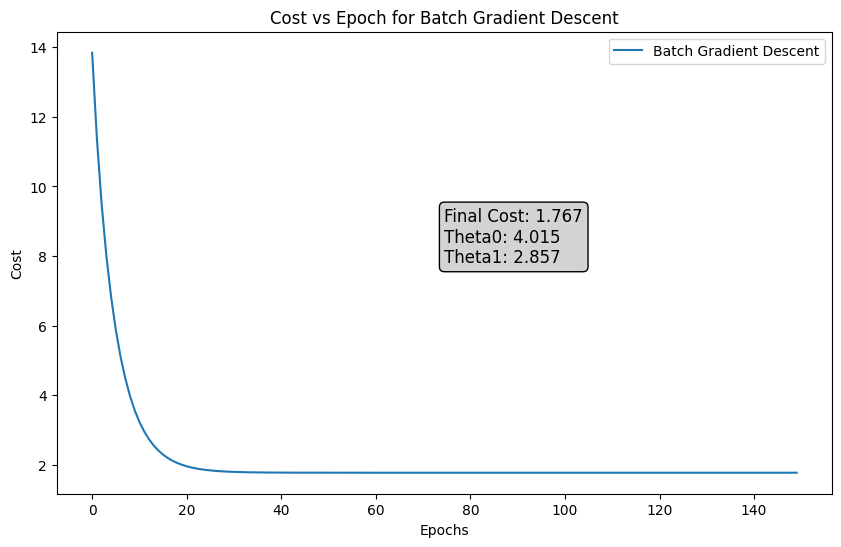

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history_bgd)),cost_history_bgd, label='Batch Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs')
plt.legend()
plt.title("Cost vs Epoch for Batch Gradient Descent")


plt.annotate(f'Final Cost: {cost_history_bgd[-1]:.3f}\nTheta0: {theta_bgd[0][0]:.3f}\nTheta1: {theta_bgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)

plt.show()

# Let's find `best fit line`coming from BGD

In [18]:
### Create a range of values for plotting the best fit line
x_plot = np.linspace(x.min(),x.max(),100).reshape(100,1)
x_b_plot = np.c_[np.ones((100,1)),x_plot]

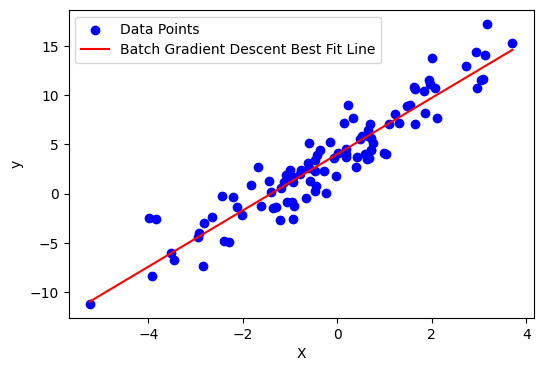

In [19]:
plt.figure(figsize = (6,4))
plt.scatter(x,y, color='blue', label='Data Points')
plt.plot(x_plot, x_b_plot.dot(theta_bgd), color = 'red', label = 'Batch Gradient Descent Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

>### Batch Gradient Descent plot using `Plotly`

In [26]:
import plotly.graph_objects as go
import plotly.express as px

In [28]:
df = pd.DataFrame({'x': x.flatten(), 'y': y.flatten()})
fig = px.scatter(df, x='x', y='y', trendline="ols",
                 trendline_color_override="red", # Matches the red line in image
                 labels={'x': 'X-axis', 'y': 'Y-axis'},
                 title="Scatter Plot with Best Fit Line")
fig.data[0].name = 'Data Points'
fig.data[0].showlegend = True
fig.data[1].name = 'Batch Gradient Descent Best Fit Line'
fig.data[1].showlegend = True
fig.show()